# Data Exploration

In [1]:
import json
import project_utilities as utils
from project_utilities import pd, np

import seaborn as sns
import matplotlib.pyplot as plt

file_name_data = 'proj1_data.json'

with open(file_name_data) as fp:
    data = json.load(fp)

## Pre-processing Data

In [2]:
X = utils.process_data(data)

## Split Data into Training, Validation, and Test Sets

In [3]:
X_train = X[0:10000]
X_validation = X[10000:11000]
X_test = X[11000:]
assert len(X_train) == 10000 , 'Expected 10000. Got %d' % len(X_train)
assert len(X_validation) == 1000 , 'Expected 1000. Got %d' % len(X_validation)
assert len(X_test) == 1000 , 'Expected 1000. Got %d' % len(X_test)

## Word Count Features

In [4]:
top_words_train = utils.get_top_words(X_train)
top_words_validation = utils.get_top_words(X_validation)

assert len(top_words_train) == 160, 'Expected 160. Got %d' % len(top_words_train)
assert len(top_words_validation) == 160, 'Expected 160. Got %d' % len(top_words_validation)

X_train = utils.insert_top_words_count(X_train, top_words_train)
X_validation = utils.insert_top_words_count(X_validation, top_words_validation)

## Linear Regression

### Prepare Data by Converting to Pandas Dataframe

In [5]:
X_train = pd.DataFrame(X_train)
X_validation = pd.DataFrame(X_validation)

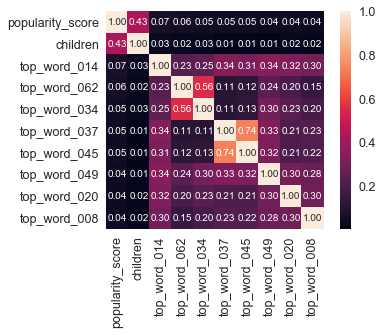

In [6]:
nb_top_corr = 10
cols = X_train.corr().nlargest(nb_top_corr, 'popularity_score')['popularity_score'].index
cm = np.corrcoef(X_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

### Train Linear Regression Model

In [7]:
model = utils.LinearRegressionModel()

In [8]:
X_train['bias'] = pd.Series(np.ones(X_train.shape[0]), index=X_train.index)
y_train = X_train['popularity_score']
X_train.drop(columns=['text', 'popularity_score'], inplace=True)

In [9]:
model.fit(X_train.values, y_train.values, epsilon=0.0001)

### Make Predictions

In [10]:
X_validation['bias'] = pd.Series(np.ones(X_validation.shape[0]), index=X_validation.index)
y_validation = X_validation['popularity_score'].values
X_validation.drop(columns=['text', 'popularity_score'], inplace=True)

In [11]:
y_validation_preds = model.predict(X_validation)

In [12]:
MSE_validation = utils.mse(y_validation, y_validation_preds)
print(MSE_validation)

2.2966466418552374


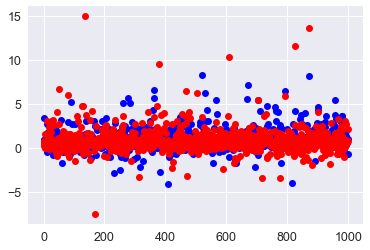

In [13]:
plt.plot(y_validation,"bo", y_validation_preds, 'ro')
plt.show()